In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('reviews_athens.csv')

In [3]:
data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...


In [4]:
data.drop(['reviewer_id', 'reviewer_name', 'comments'], axis=1, inplace=True)


In [5]:
data.rename({'id':'review_count'}, axis=1, inplace=True)
data.review_count = 1

In [6]:
print("The first dataset has {} rows and {} columns.".format(*data.shape))
print("It contains {} duplicates.".format(data.duplicated().sum()))

The first dataset has 406607 rows and 3 columns.
It contains 673 duplicates.


In [7]:
data.date = pd.to_datetime(data.date, format="%Y-%m-%d")

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406607 entries, 0 to 406606
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   listing_id    406607 non-null  int64         
 1   review_count  406607 non-null  int64         
 2   date          406607 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 9.3 MB


In [9]:
data.tail(2)

,listing_id,review_count,date
406605,52809823,1,2021-10-24
406606,52810712,1,2021-10-21


In [10]:
from datetime import datetime
data=data.sort_values('date')

In [11]:
data
df_raw=data

In [12]:
data

,listing_id,review_count,date
155,10995,1,2010-07-08
661,33945,1,2010-11-02
856,59663,1,2010-12-11
857,59663,1,2010-12-29
858,59663,1,2011-01-07
...,...,...,...
166203,18872707,1,2021-10-25
340820,33990666,1,2021-10-25
375079,40074700,1,2021-10-25
166471,18907660,1,2021-10-25


In [13]:
count_2020_21=data[data["date"].isin(pd.date_range('2020-10-01', '2021-10-19'))]
count_2020_19=data[data["date"].isin(pd.date_range('2019-01-01', '2020-12-31'))]


In [14]:
count_2020_21.head(30)

,listing_id,review_count,date
136336,16994103,1,2020-10-01
394622,45514012,1,2020-10-01
243764,24912217,1,2020-10-01
290980,29009667,1,2020-10-01
304432,30314695,1,2020-10-01
338612,33853797,1,2020-10-01
353326,35493195,1,2020-10-01
61628,9223182,1,2020-10-01
318046,32099081,1,2020-10-01
221586,23336651,1,2020-10-01


In [15]:
print("The dataset 2020/2021 has {} reviews and {} columns.".format(*count_2020_21.shape))

The dataset 2020/2021 has 87335 reviews and 3 columns.


In [16]:
count_2020_21 = count_2020_21.set_index('date').sort_index()

In [17]:
count_2020_21_monthly = count_2020_21.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(reviews_per_month='count').reset_index()
                                                                       

In [18]:
count_2020_21_monthly.columns = ['date', 'listing_id', 'reviews_per_month']

In [19]:
count_2020_21_monthly.set_index('date', inplace=True)

In [20]:
count_2020_21_monthly.head(5)

,listing_id,reviews_per_month
date,,
2020-10-31,10595,1
2020-10-31,10993,2
2020-10-31,10995,1
2020-10-31,80598,3
2020-10-31,179705,1


In [21]:
count_2020_21_monthly=count_2020_21_monthly.reset_index()
count_2020_21_monthly=pd.DataFrame(count_2020_21_monthly.groupby('listing_id')['reviews_per_month'].mean().reset_index())

In [22]:
count_2020_21_monthly.head(10)

,listing_id,reviews_per_month
0,10595,2.000000
1,10990,1.714286
2,10993,1.909091
3,10995,1.000000
4,28186,2.500000
5,59663,2.200000
6,80598,2.000000
7,131133,1.000000
8,133835,1.000000
9,133906,1.400000


In [24]:
data_list=pd.read_csv("listings_athens.csv")

In [25]:
data_list.tail(
)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9577,52959003,https://www.airbnb.com/rooms/52959003,20211025162728,2021-10-25,Designed studio + Breakfast near Monastiraki S...,Lovely studio apartment of 30m² in a prime loc...,NaN,https://a0.muscache.com/pictures/02221d19-57d2...,3296820,https://www.airbnb.com/users/show/3296820,...,NaN,NaN,NaN,00174959325,t,19,19,0,0,NaN
9578,52959885,https://www.airbnb.com/rooms/52959885,20211025162728,2021-10-26,3 floor beds,Απολαύστε τα απλά πράγματα σε αυτόν τον γαλήνι...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,142353607,https://www.airbnb.com/users/show/142353607,...,NaN,NaN,NaN,00000240858,t,2,1,1,0,NaN
9579,52959925,https://www.airbnb.com/rooms/52959925,20211025162728,2021-10-26,Athens Spacious 4 Bedrooms 2 Bathrooms Apartment,A spacious apartment with 4 bedrooms and 2 bat...,NaN,https://a0.muscache.com/pictures/a0414000-d673...,103217576,https://www.airbnb.com/users/show/103217576,...,NaN,NaN,NaN,00001137032,t,11,11,0,0,NaN
9580,52960132,https://www.airbnb.com/rooms/52960132,20211025162728,2021-10-26,Athens Center Spacious Apartment 5th floor (33),Spacious and Central apartment ideal for big g...,NaN,https://a0.muscache.com/pictures/f673be27-96c5...,103217576,https://www.airbnb.com/users/show/103217576,...,NaN,NaN,NaN,00000173608,t,11,11,0,0,NaN
9581,52960302,https://www.airbnb.com/rooms/52960302,20211025162728,2021-10-26,Budget Apartment for groups at Kerameikos Metr...,cozy central apartment with nice view<br /><b...,NaN,https://a0.muscache.com/pictures/679b6fa9-222e...,103217576,https://www.airbnb.com/users/show/103217576,...,NaN,NaN,NaN,1168996,t,11,11,0,0,NaN


In [26]:
data_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [27]:
data_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9582 non-null   int64  
 1   listing_url                                   9582 non-null   object 
 2   scrape_id                                     9582 non-null   int64  
 3   last_scraped                                  9582 non-null   object 
 4   name                                          9579 non-null   object 
 5   description                                   9486 non-null   object 
 6   neighborhood_overview                         6622 non-null   object 
 7   picture_url                                   9582 non-null   object 
 8   host_id                                       9582 non-null   int64  
 9   host_url                                      9582 non-null   o

In [28]:
data_main=pd.merge(count_2020_21_monthly,data_list[['id', 'price', 'neighbourhood_group_cleansed', 
                          'latitude', 'longitude', 'property_type', 'accommodates', 
                          'bathrooms','room_type', 'bedrooms', 'beds', 'host_is_superhost','minimum_nights']], 
              left_on='listing_id', right_on='id')

In [29]:
data_main.drop(['id'], axis=1, inplace=True)

In [30]:


data_main.rename({'neighbourhood_group_cleansed':'neighbourhood'}, axis=1, inplace=True)

In [31]:
print("The dataset has {} rows and {} columns - after combining it.".format(*data_main.shape))
print("It contains {} duplicates.".format(data_main.duplicated().sum()))
data_main.head(50)

The dataset has 6025 rows and 14 columns - after combining it.
It contains 0 duplicates.


,listing_id,reviews_per_month,price,neighbourhood,latitude,longitude,property_type,accommodates,bathrooms,room_type,bedrooms,beds,host_is_superhost,minimum_nights
0,10595,2.000000,$79.00,NaN,37.988630,23.76527,Entire rental unit,8,NaN,Entire home/apt,3.0,5.0,t,1
1,10990,1.714286,$50.00,NaN,37.989030,23.76448,Entire rental unit,4,NaN,Entire home/apt,1.0,1.0,t,1
2,10993,1.909091,$38.00,NaN,37.988880,23.76473,Entire rental unit,2,NaN,Entire home/apt,NaN,1.0,t,1
3,10995,1.000000,$48.00,NaN,37.989030,23.76448,Entire rental unit,4,NaN,Entire home/apt,1.0,2.0,t,1
4,28186,2.500000,$59.00,NaN,37.975450,23.72892,Entire loft,4,NaN,Entire home/apt,1.0,2.0,t,2
5,59663,2.200000,$50.00,NaN,37.990180,23.72185,Entire rental unit,6,NaN,Entire home/apt,4.0,4.0,f,2
6,80598,2.000000,$32.00,NaN,37.992570,23.70941,Entire rental unit,2,NaN,Entire home/apt,1.0,1.0,t,2
7,131133,1.000000,$56.00,NaN,38.001720,23.74866,Entire rental unit,5,NaN,Entire home/apt,1.0,0.0,f,2
8,133835,1.000000,$40.00,NaN,37.977940,23.74371,Entire rental unit,2,NaN,Entire home/apt,1.0,1.0,t,5
9,133906,1.400000,$69.00,NaN,38.001720,23.74866,Entire rental unit,7,NaN,Entire home/apt,2.0,7.0,f,2


In [32]:
data_main['minimum_nights'].mean()


2.6194190871369294

In [33]:
data_main['reviews_per_month'].mean()

2.377543978842737

In [34]:
data_main.price = data_main.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [35]:
data_main['price'].describe()

count    6025.000000
mean       64.705394
std        88.854599
min         9.000000
25%        35.000000
50%        49.000000
75%        70.000000
max      5000.000000
Name: price, dtype: float64

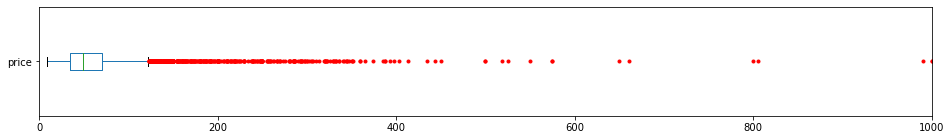

In [36]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_main['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

75% of data is 246 dollars .so lets remove extremly priced above 450 

In [38]:
data_main.drop(data_main[data_main['price'] > 350].index, axis=0, inplace=True)
data_main['price'].describe()

count    5993.000000
mean       61.155348
std        44.716818
min         9.000000
25%        35.000000
50%        49.000000
75%        70.000000
max       350.000000
Name: price, dtype: float64

Monthly Occupancy Rate = Average Length of Stay * (No. of reviews per Month / Review Rate)
According to the latest Airbnb update, guests who booked stays in Athens in 2021 via Airbnb spent 3.9 nights here on average.

Yearly Income = Monthly Occupancy Rate Price 12 Months

In [39]:
avg_length_of_stay=3.9
review_rate_modest=0.5

In [40]:
data_main['modest_occupancy'] = round(avg_length_of_stay * (data_main['reviews_per_month']/review_rate_modest), 2)

In [41]:
len(data_main[data_main['modest_occupancy'] > 100])

2

In [42]:
data_main.drop(data_main[(data_main['modest_occupancy'] > 100)].index, axis=0, inplace=True)

In [43]:
data_main['modest_occupancy'].describe()

count    5991.000000
mean       18.508553
std        11.401727
min         7.800000
25%         9.360000
50%        15.600000
75%        23.400000
max        95.550000
Name: modest_occupancy, dtype: float64

In [44]:
data_main['optimistic_occupancy'] = round(avg_length_of_stay * (data_main['reviews_per_month']/0.4), 2)

In [45]:
len(data_main[data_main['optimistic_occupancy'] > 100])

5

In [46]:
data_main['optimistic_occupancy'].describe()

count    5991.000000
mean       23.135517
std        14.252189
min         9.750000
25%        11.700000
50%        19.500000
75%        29.250000
max       119.440000
Name: optimistic_occupancy, dtype: float64

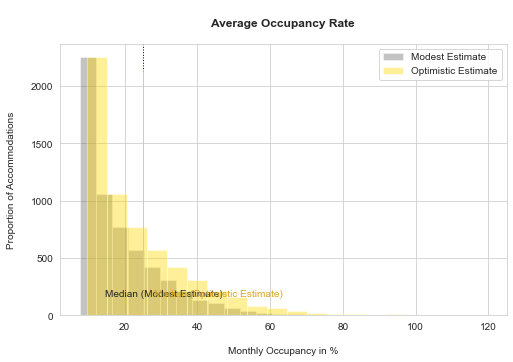

In [47]:

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(data_main['modest_occupancy'], kde=False, bins=20, color='dimgrey')
sns.distplot(data_main['optimistic_occupancy'], kde=False, bins=20, color='gold')

plt.title('\nAverage Occupancy Rate\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nMonthly Occupancy in %')
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=25, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(14.5, 165, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=25, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='gold')
plt.text(28, 165, 'Median (Optimistic Estimate)', color='goldenrod');

In [48]:
data_main['modest_income'] = data_main['modest_occupancy'] * data_main['price'] * 12
data_main.modest_income.describe()

count      5991.000000
mean      13454.322223
std       13240.689016
min         936.000000
25%        5477.580000
50%        9360.000000
75%       16618.680000
max      156702.000000
Name: modest_income, dtype: float64

In [49]:
data_main['optimistic_income'] = data_main['optimistic_occupancy'] * data_main['price'] * 12
data_main.optimistic_income.describe()

count      5991.000000
mean      16817.755794
std       16550.720560
min        1170.000000
25%        6847.800000
50%       11700.000000
75%       20775.480000
max      195860.280000
Name: optimistic_income, dtype: float64

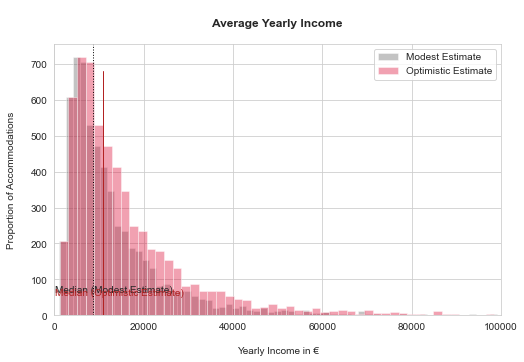

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(data_main['modest_income'], kde=False, bins=100, color='dimgrey')
sns.distplot(data_main['optimistic_income'], kde=False, bins=100, color='crimson')

plt.title('\nAverage Yearly Income\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nYearly Income in €')
plt.xlim((0,100000))
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=8709, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(60, 65, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=10886, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='firebrick')
plt.text(100, 55, 'Median (Optimistic Estimate)', color='firebrick');

# To examine if there's an underlying seasonality, let's split the dataset we loaded at the very beginning by year


In [51]:
df_raw.tail(100)

,listing_id,review_count,date
237613,24487266,1,2021-10-24
180635,19792787,1,2021-10-24
179149,19697811,1,2021-10-24
385992,42746904,1,2021-10-24
394330,45437989,1,2021-10-24
...,...,...,...
166203,18872707,1,2021-10-25
340820,33990666,1,2021-10-25
375079,40074700,1,2021-10-25
166471,18907660,1,2021-10-25


In [52]:
pf=df_raw[df_raw["date"].isin(pd.date_range('2021-01-01', '2021-10-10'))]

count_2021=pf
count_2021 = count_2021.set_index('date').sort_index()

In [53]:
count_2021

,listing_id,review_count
date,,
2021-01-01,35064814,1
2021-01-01,25346547,1
2021-01-01,30012109,1
2021-01-01,14102785,1
2021-01-01,40415865,1
...,...,...
2021-10-10,35064814,1
2021-10-10,17717518,1
2021-10-10,43907288,1


In [54]:
count_2021 = df_raw[df_raw["date"].isin(pd.date_range('2021-01-01', '2021-10-19'))]
count_2020 = df_raw[df_raw["date"].isin(pd.date_range('2020-01-01', '2020-12-31'))]
count_2019 = df_raw[df_raw["date"].isin(pd.date_range('2019-01-01', '2019-12-31'))]
count_2018 = df_raw[df_raw["date"].isin(pd.date_range('2018-01-01', '2018-12-31'))]


# set the date as index and sort by index
count_2021 = count_2021.set_index('date').sort_index()
count_2020 = count_2020.set_index('date').sort_index()
count_2019 = count_2019.set_index('date').sort_index()
count_2018 = count_2018.set_index('date').sort_index()

# calculate reviews per month    
count_2021_monthly = count_2021.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_21='count').reset_index()
count_2020_monthly = count_2020.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_20='count').reset_index()
count_2019_monthly = count_2019.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_19='count').reset_index()
count_2018_monthly = count_2018.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_18='count').reset_index()

# flatten the multi-index
count_2021_monthly.columns = ['date', 'listing_id', 'reviews_per_month_21']
count_2020_monthly.columns = ['date', 'listing_id', 'reviews_per_month_20']
count_2019_monthly.columns = ['date', 'listing_id', 'reviews_per_month_19']
count_2018_monthly.columns = ['date', 'listing_id', 'reviews_per_month_18']

# set date as index
count_2021_monthly.set_index('date', inplace=True)
count_2020_monthly.set_index('date', inplace=True)
count_2019_monthly.set_index('date', inplace=True)
count_2018_monthly.set_index('date', inplace=True)


In [55]:
count_2021_monthly

,listing_id,reviews_per_month_21
date,,
2021-01-31,10993,2
2021-01-31,80598,1
2021-01-31,270973,1
2021-01-31,401423,1
2021-01-31,502779,1
...,...,...
2021-10-31,52625664,1
2021-10-31,52629097,1
2021-10-31,52663856,2


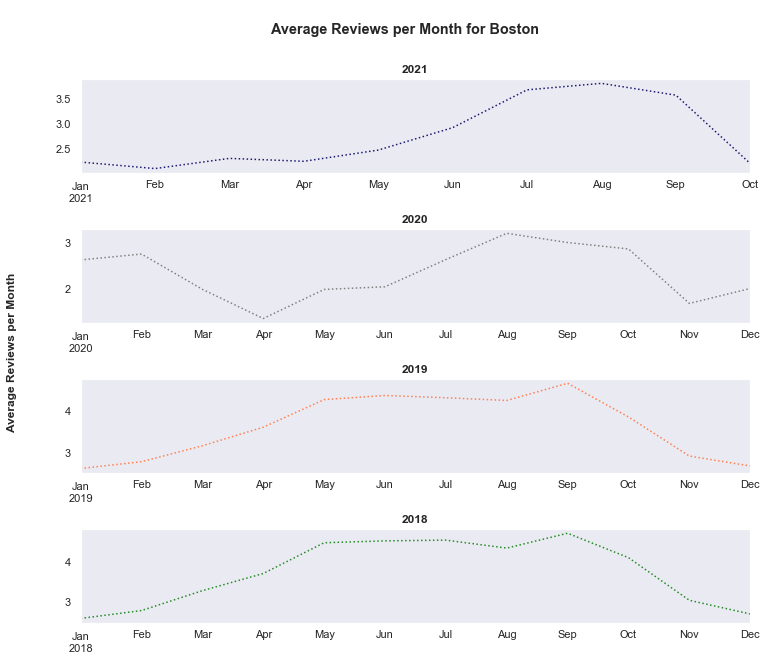

In [56]:
sns.set(style="dark")
fig, axes = plt.subplots(4, 1, figsize=(12,10))

sub_1 = count_2021_monthly.groupby('date')['reviews_per_month_21'].mean()
sub_1.plot(ax=axes[0], color='midnightblue', style=':')
axes[0].set_title('2021', fontweight='bold')
axes[0].set_xlabel('') 

sub_2 = count_2020_monthly.groupby('date')['reviews_per_month_20'].mean()
sub_2.plot(ax=axes[1], color='grey', style=':')
axes[1].set_title('2020', fontweight='bold')
axes[1].set_xlabel('') 

sub_3 = count_2019_monthly.groupby('date')['reviews_per_month_19'].mean()
sub_3.plot(ax=axes[2], color='coral', style=':')
axes[2].set_title('2019', fontweight='bold')
axes[2].set_xlabel('') 

sub_4 = count_2018_monthly.groupby('date')['reviews_per_month_18'].mean()
sub_4.plot(ax=axes[3], color='forestgreen', style=':')
axes[3].set_title('2018', fontweight='bold')
axes[3].set_xlabel('') 



# adjust space between subplots and set a title
plt.subplots_adjust(hspace = 0.6)
plt.suptitle('\nAverage Reviews per Month for Boston\n', fontweight='bold')

# plot common y-label
fig.text(0.04, 0.5, 'Average Reviews per Month', fontweight='bold', va='center', rotation='vertical');

# from above dataset we can observe that october is the peak season 
may-september there is peak season and then 

# sipke_detection


# 2019

In [57]:
count_2021 = data[data["date"].isin(pd.date_range('2019-01-01', '2021-10-19'))]


In [58]:
data2 = data[data["date"].isin(pd.date_range('2019-01-01', '2019-12-31'))]

In [59]:
season_19=pd.merge(data2,data_list[['id', 'price','property_type']], 
              left_on='listing_id', right_on='id')
season_19.drop(['review_count', 'id'], axis='columns', inplace=True)
season_19.price =season_19.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [60]:
season_19_peak=season_19[season_19["date"].isin(pd.date_range('2019-05-01', '2019-6-30'))]
season_19_peak_2=season_19[season_19["date"].isin(pd.date_range('2019-09-01', '2019-10-31'))]
p1=season_19_peak_2['price'].mean()
p2=season_19_peak['price'].mean()
res1=(p1+p2)/2
season_19_off=season_19[season_19["date"].isin(pd.date_range('2019-11-01', '2019-12-31'))]
season_19_off
p3=season_19_off['price'].mean()
season_19_off2=season_19[season_19["date"].isin(pd.date_range('2019-01-01', '2019-02-28'))]
p4=season_19_off2['price'].mean()
res2=(p3+p4)/2
(res1-res2)/res1

-0.023637700432975927

In [61]:
data3 = data[data["date"].isin(pd.date_range('2018-01-01', '2018-12-31'))]

In [62]:
data3

,listing_id,review_count,date
49209,6485563,1,2018-01-01
123247,15952250,1,2018-01-01
136211,16994103,1,2018-01-01
133074,16596657,1,2018-01-01
199695,21731954,1,2018-01-01
...,...,...,...
260560,26006206,1,2018-12-31
140725,17329473,1,2018-12-31
305162,30385286,1,2018-12-31
262218,26099544,1,2018-12-31


In [63]:
season_18=pd.merge(data3,data_list[['id', 'price','neighbourhood_cleansed','property_type']], 
              left_on='listing_id', right_on='id')
season_18.drop(['review_count', 'id'], axis='columns', inplace=True)


In [64]:

season_18.price =season_18.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [65]:
season_18

,listing_id,date,price,neighbourhood_cleansed,property_type
0,6485563,2018-01-01,47,ΠΑΓΚΡΑΤΙ,Entire rental unit
1,6485563,2018-02-12,47,ΠΑΓΚΡΑΤΙ,Entire rental unit
2,6485563,2018-02-14,47,ΠΑΓΚΡΑΤΙ,Entire rental unit
3,6485563,2018-02-18,47,ΠΑΓΚΡΑΤΙ,Entire rental unit
4,6485563,2018-03-06,47,ΠΑΓΚΡΑΤΙ,Entire rental unit
...,...,...,...,...,...
78360,30391533,2018-12-31,56,ΝΕΟΣ ΚΟΣΜΟΣ,Room in aparthotel
78361,30519522,2018-12-31,81,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,Entire rental unit
78362,30221476,2018-12-31,48,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire rental unit
78363,30903535,2018-12-31,35,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,Entire rental unit


In [66]:
tr=pd.DataFrame(data_list.groupby('neighbourhood_cleansed')['id'].nunique())


In [67]:
df=season_18.groupby(['neighbourhood_cleansed']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()


In [68]:
df=season_18.groupby(['date','listing_id']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()
df

date listing_id price          
                              min  max mean
0     2018-01-01     778192    67   67   67
1     2018-01-01    1177492    35   35   35
2     2018-01-01    1989905   147  147  147
3     2018-01-01    2579525    33   33   33
4     2018-01-01    3290710    25   25   25
...          ...        ...   ...  ...  ...
78334 2018-12-31   30519522    81   81   81
78335 2018-12-31   30638600    25   25   25
78336 2018-12-31   30668610    25   25   25
78337 2018-12-31   30903535    35   35   35
78338 2018-12-31   30922142    92   92   92

[78339 rows x 5 columns]

In [118]:

filtered_data = df[df['listing_id']==1071235]
filtered_data

Empty DataFrame
Columns: [(date, ), (listing_id, ), (price, min), (price, max), (price, mean)]
Index: []

In [69]:
df=season_19.groupby(['property_type']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()
df

property_type price                  
                                          min   max        mean
0                             Camper/RV    30    30   30.000000
1                           Earth house    35    60   35.265957
2            Entire condominium (condo)    15   413   50.935763
3                    Entire guest suite    24   116   44.882653
4                     Entire guesthouse    21    48   32.341772
5                           Entire loft    15   322   71.685322
6                          Entire place    80   347  291.375000
7                    Entire rental unit    10  8000   63.734452
8               Entire residential home    16  1500   97.036824
9             Entire serviced apartment    33   287  155.535270
10                     Entire townhouse    32   145   59.488189
11                         Entire villa   136   518  312.604167
12                                Floor   267   267  267.000000
13    Private room in bed and breakfast    17    70   48.000000
14  Private room in condominium (condo)    13    40   26.444828
15                Private room in floor    20    20   20.000000
16          Private room in guest suite    43    45   44.255814
17           Private room in guesthouse    40    46   40.285714
18               Private room in hostel    15    15   15.000000
19                 Private room in loft    30    30   30.000000
20          Private room in rental unit    12  5000   45.169910
21     Private room in residential home    16    72   26.933566
22               Private room in resort    45    45   45.000000
23   Private room in serviced apartment    13    90   16.558824
24                   Room in aparthotel    39   990   81.525692
25               Room in boutique hotel   100   365  310.630769
26                        Room in hotel    35   150   69.823529
27           Room in serviced apartment    30  8000  105.896657
28                Shared room in hostel    12    25   18.111111
29          Shared room in nature lodge    12    12   12.000000
30           Shared room in rental unit    11    18   15.882353
31      Shared room in residential home    10   500  479.148936
32                           Tiny house    25    40   35.312903